In [63]:
def myplot(img, img2=None):
    
    img = img.astype(np.uint8)
    im4p = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img2 is None:
#     plt.subplot(121)
        plt.imshow(im4p,  cmap="gray")

    else  :
        plt.subplot(121)
        plt.imshow(im4p)

        im4p2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        plt.subplot(122)
        plt.imshow(im4p2)

## 3-9-1

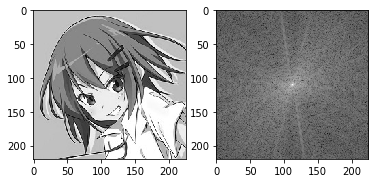

In [64]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


def main():
    img = cv2.imread("./sample/3-9/input.png")

    # グレースケール変換
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    fimg = np.fft.fft2(gray)
    fimg = np.fft.fftshift(fimg)

    mag = 20*np.log(np.abs(fimg))

    plt.subplot(121)
    plt.imshow(gray, cmap="gray")

    plt.subplot(122)
    plt.imshow(mag, cmap="gray")


#     myplot(mag)
main()

## 3-9-2

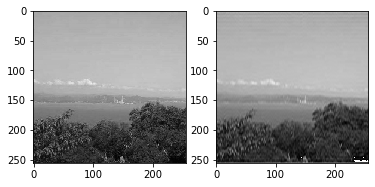

In [65]:
import numpy as np
import cv2

def lowpass_filter(src, a = 0.5) :
    
    src = np.fft.fft2(src)
    
    #画像サイズ
    h, w = src.shape

    # 画像の中心
    cy, cx = int(h/2), int(w/2)
    
    # フィルタのサイズ
    rh, rw = int(a*cy), int(w/2)
    
    # 第１象限と第３象限、第１象限と第４象限
    fsrc = np.fft.fftshift(src)
    
    # 入力画像と同じサイズで値0の配列を作成
    fdst = np.zeros(src.shape, dtype=complex)
    
    #中心部分の値だけ代入
    fdst[cy-rh: cy+rh, cx-rw:cx+rw] = fsrc[cy-rh:cy+rh, cx-rw:cx+rw]
    
    # 第一象限と第三象限、第一象限と第四象限を入れ替え(もとに戻す)
    fdst = np.fft.fftshift(fdst)
    
    # 高速逆フーリエ変換
    dst = np.fft.ifft2(fdst)
    
    return np.uint8(dst.real)
    
    
def main():
    img = cv2.imread("./sample/3-9/input2.png")
    
    # グレースケール
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    # ローパスフィルタ
    himg = lowpass_filter(gray, 0.3)
    
    # 処理結果を出力
#     cv2.imwrite("output.png", himg)
    myplot(img,himg)
    
main()

In [47]:
!ls "sample/3-9/"

input.png  input2.png  output.png  sample91.py	sample92.py
